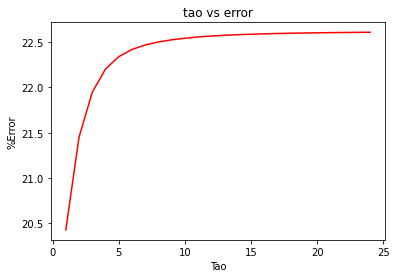

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fetching the data from csv
data = pd.read_csv('Housing Price data set.csv')
data = data.drop(['Unnamed: 0', 'driveway', 'recroom', 'stories', 'fullbase',
                  'airco', 'prefarea', 'gashw', 'stories', 'garagepl'], axis=1)

# Calculating mean and standard deviation
mean = data.mean()[0]
stddev = data.std()[0]
data = (data - data.mean())/data.std()
data = np.asarray(data)
train_y = data[:, 0:1]
train_x = data[:, 1:]
identity = np.ones((len(train_x), 1))
train_x = np.concatenate((identity, train_x), axis=1)
# print(train_x.shape, train_y.shape)

# Locally Weighted Regression with normal Equation


def LWR(X, Y, idx, tau):
    wi = np.exp(np.sum((X-X[idx])**2, axis=1) / (-2*tau*tau))
    W = wi * np.identity(X.shape[0])
    theta = np.linalg.inv(X.T@W@X)@X.T@W@Y
    return theta


X = []
error = []
for j in range(1, 25):
    X.append(j)
    e = 0
    predict_y = []
    for i in range(len(train_x)):
        theta = LWR(train_x, train_y, i, j)
        pred = (train_x[i]@(theta))*stddev + mean
        actual = (train_y[i]) * stddev + mean
        predict_y.append(pred)
        e += abs(pred - actual) / actual
    error.append(e / len(train_x)*100)


plt.plot(X, error, color='r')
plt.xlabel('Tao')
plt.ylabel('%'+'Error')
plt.title('tao vs error')
plt.show()